# Principal component analysis
Zhixiang Lin
 12/16/2024

## Compare spectral decomposition and SVD

In [1]:
n <- 1000
p <- 3000
Y <- matrix(rnorm(n*p), nrow=n)
print(system.time(tmp1 <- eigen(t(Y)%*%Y)))
print(system.time(tmp2 <- svd(Y)))

   user  system elapsed 
 31.814   0.680  33.239 
   user  system elapsed 
  1.996   0.063   2.070 


In [2]:
eigen_values <- tmp1$values ## eigenvalues
eigen_vector <- tmp1$vectors ## eigenvectors

In [3]:
d <- tmp2$d
v <- tmp2$v

Check the eigenvector

In [4]:
head(eigen_vector[,1])
head(v[,1])

[1] -0.017290242  0.005656729  0.007704370  0.026631827 -0.039990482
[6] -0.000741947

[1]  0.017290242 -0.005656729 -0.007704370 -0.026631827  0.039990482
[6]  0.000741947

Check the eigenvalues

In [5]:
head(eigen_values)
head(d^2)

[1] 7391.677 7360.675 7322.841 7275.158 7216.917 7181.464

[1] 7391.677 7360.675 7322.841 7275.158 7216.917 7181.464

## Compare princomp and prcomp

In [6]:
n <- 10^3
p <- 10^2
X <- matrix(rnorm(n*p), nrow=n)
pca1 <- princomp(X, cor = FALSE) ## this one implements spectral decomposition for PCA
pca2 <- prcomp(X, center = TRUE, scale=FALSE) ## this one implements SVD for PCA
names(pca1)
names(pca2)

[1] "sdev"     "loadings" "center"   "scale"    "n.obs"    "scores"   "call"

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [7]:
head(pca1$sdev)
head(pca2$sdev)

Comp.1   Comp.2   Comp.3   Comp.4   Comp.5   Comp.6 
1.309045 1.288038 1.279473 1.269890 1.255979 1.245397

[1] 1.309700 1.288682 1.280113 1.270526 1.256608 1.246020

check standard deviation for the PCs

In [8]:
head(pca1$loadings[,1])
head(pca2$rotation[,1])
head(pca1$loadings[,2])
head(pca2$rotation[,2])

[1]  0.009076094  0.003837387 -0.128923675  0.040894269 -0.115779827
[6] -0.086308352

[1] -0.009076094 -0.003837387  0.128923675 -0.040894269  0.115779827
[6]  0.086308352

[1]  0.0372592788 -0.0820805389  0.0361717135 -0.1264404442 -0.0002756644
[6] -0.1234130969

[1]  0.0372592788 -0.0820805389  0.0361717135 -0.1264404442 -0.0002756644
[6] -0.1234130969

check the principal components

In [9]:
pca1_PC1 <- pca1$scores[,1] ## PC1
pca2_PC1 <- pca2$x[,1] ## PC1
head(pca1_PC1)
head(pca2_PC1)

[1]  1.1207792  2.9434608  1.1813343  2.2441348 -0.4808738  1.6983022

[1] -1.1207792 -2.9434608 -1.1813343 -2.2441348  0.4808738 -1.6983022

Use the correlation matrix for PCA

In [10]:
pca1_1 <- princomp(X, cor = T) ## this one implements spectral decomposition
pca2_1 <- prcomp(X, center = TRUE, scale=T) ## this one implements SVD

Check standard deviation for the PCs

In [11]:
head(pca1_1$sdev)
head(pca2_1$sdev)

Comp.1   Comp.2   Comp.3   Comp.4   Comp.5   Comp.6 
1.305333 1.282466 1.275796 1.260590 1.255858 1.244030

[1] 1.305333 1.282466 1.275796 1.260590 1.255858 1.244030

Check the loading for the PCs

In [12]:
head(pca1_1$loadings[,1])
head(pca2_1$rotation[,1])
head(pca1_1$loadings[,2])
head(pca2_1$rotation[,2])

[1]  0.003001927  0.007024625  0.131794854 -0.039191700  0.144494579
[6]  0.071609386

[1]  0.003001927  0.007024625  0.131794854 -0.039191700  0.144494579
[6]  0.071609386

[1]  0.08534455 -0.02914663 -0.01541246 -0.04725001  0.05958855 -0.12371788

[1] -0.08534455  0.02914663  0.01541246  0.04725001 -0.05958855  0.12371788

## princomp requires n>p

In [13]:
p <- 10^2
X <- matrix(rnorm(n*p), nrow=n)

This will give an error

In [14]:
pca1 <- princomp(X, cor = FALSE) ## this one implements spectral decomposition for PCA

In [15]:
pca2 <- prcomp(X, center = TRUE, scale=FALSE) ## this one implements SVD for PCA

## Image analysis

This library is needed for mypar

In [17]:

install.packages("rafalib")

library(rafalib)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



You need to download  `one_digit3.RData` from blackboard and upload to colab.

In [20]:
load(file="one_digit3.RData")

The image is stored as a $28 \times 28$ matrix, the range of each entry in the matrix is between 0 and 255

In [21]:
print(dim(X))
print(max(X))
print(min(X))

[1] 28 28
[1] 255
[1] 0


visualize the data. Black is 255, white is 0

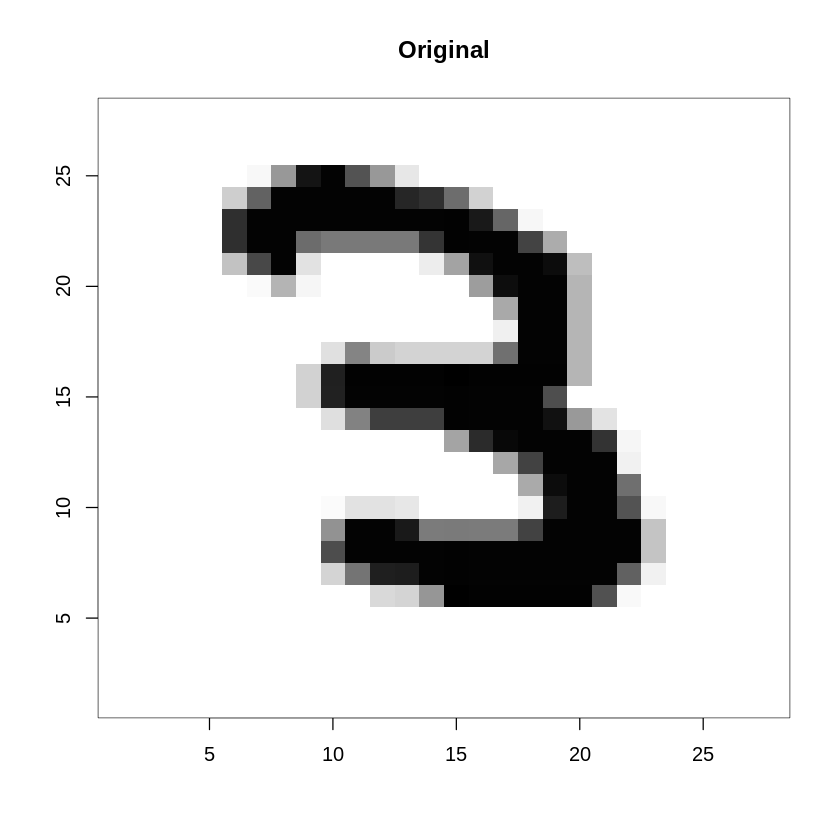

In [22]:
image(1:28, 1:28, z=X, main="Original", xlab="", ylab="", col=gray((255:0)/255))

## SVD for image compression

You can see that when nComp=5, visually the reconstruction is quite well. For X, you need to save $28 \times 28=784$ numbers, for X_hat_svd (nComp=5), you need to save $28 \times 5$ (U) + $5$ (d) + $28 \times 5$ (V) = 285 numbers.

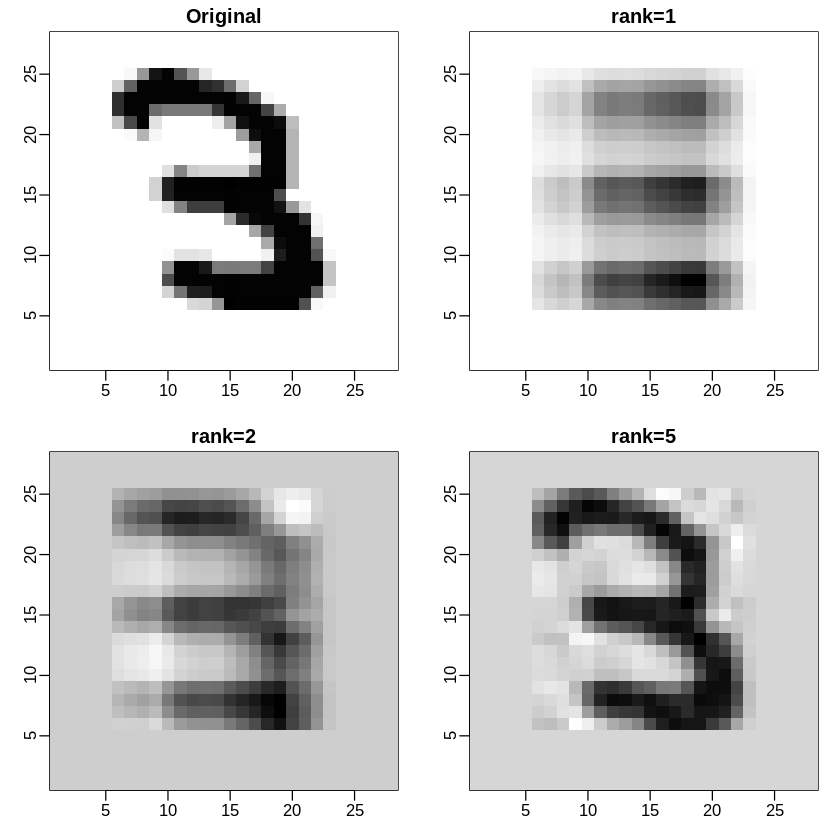

In [25]:
X_svd <- svd(X)
mypar(mfrow=c(2, 2))
## the orignial image
image(1:28, 1:28, z=X, main="Original", xlab="", ylab="", col=gray((255:0)/255))

nComp <- 1
X_hat_svd <- X_svd$d[1:nComp]*( (X_svd$u)[,1:nComp]%*%t((X_svd$v)[,1:nComp]) )
image(1:28, 1:28, z=X_hat_svd, main=paste("rank=", nComp, sep=""), xlab="", ylab="", col=gray((255:0)/255))

nComp <- 2
X_hat_svd <- (X_svd$u)[,1:nComp]%*%diag(X_svd$d[1:nComp])%*%t((X_svd$v)[,1:nComp])
image(1:28, 1:28, z=X_hat_svd, main=paste("rank=", nComp, sep=""), xlab="", ylab="", col=gray((255:0)/255))

nComp <- 5
X_hat_svd <- (X_svd$u)[,1:nComp]%*%diag(X_svd$d[1:nComp])%*%t((X_svd$v)[,1:nComp])
image(1:28, 1:28, z=X_hat_svd, main=paste("rank=", nComp, sep=""), xlab="", ylab="", col=gray((255:0)/255))









more components. nComp=28 is the same as the original image

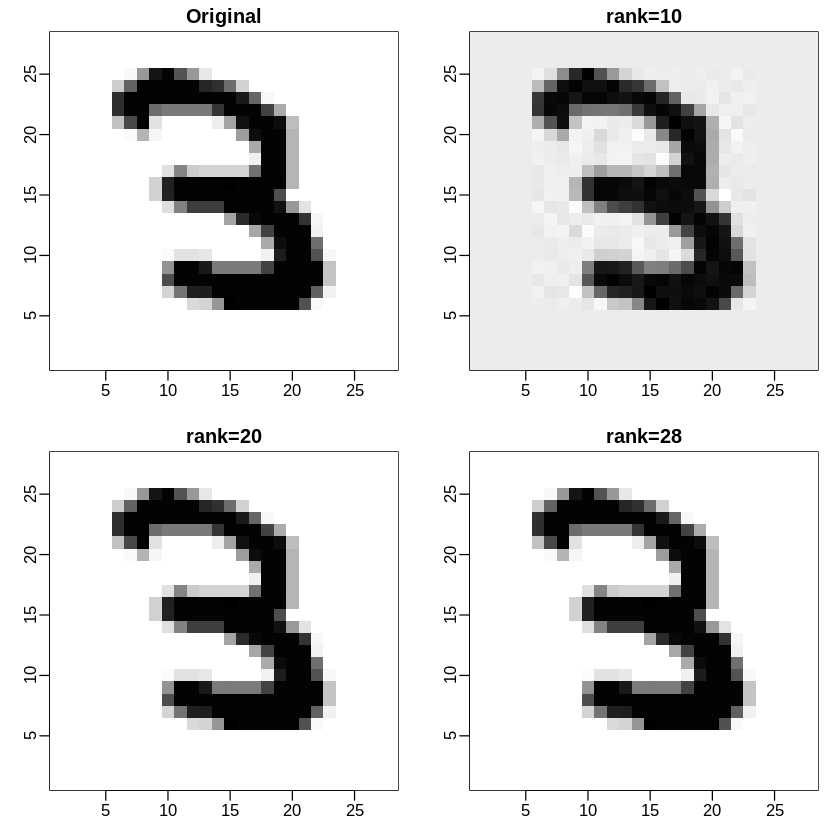

In [26]:
X_svd <- svd(X)
mypar(mfrow=c(2, 2))
## the orignial image
image(1:28, 1:28, z=X, main="Original", xlab="", ylab="", col=gray((255:0)/255))

nComp <- 10
X_hat_svd <- (X_svd$u)[,1:nComp]%*%diag(X_svd$d[1:nComp])%*%t((X_svd$v)[,1:nComp])
image(1:28, 1:28, z=X_hat_svd, main=paste("rank=", nComp, sep=""), xlab="", ylab="", col=gray((255:0)/255))

nComp <- 20
X_hat_svd <- (X_svd$u)[,1:nComp]%*%diag(X_svd$d[1:nComp])%*%t((X_svd$v)[,1:nComp])
image(1:28, 1:28, z=X_hat_svd, main=paste("rank=", nComp, sep=""), xlab="", ylab="", col=gray((255:0)/255))

nComp <- 28
X_hat_svd <- (X_svd$u)[,1:nComp]%*%diag(X_svd$d[1:nComp])%*%t((X_svd$v)[,1:nComp])
image(1:28, 1:28, z=X_hat_svd, main=paste("rank=", nComp, sep=""), xlab="", ylab="", col=gray((255:0)/255))


## PCA 1

This should be exactly the same as SVD

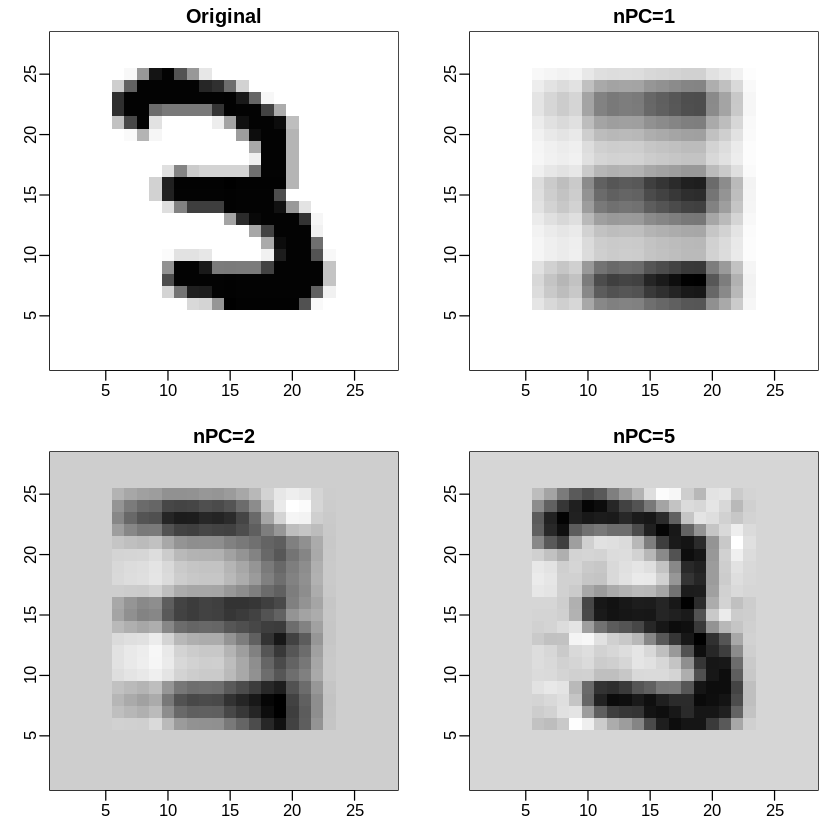

In [27]:
n <- 28
X_spectral1 <- eigen(1/(n-1)*t(X)%*%X) ## spectral decomposition

mypar(mfrow=c(2, 2))
## the orignial image
image(1:28, 1:28, z=X, main="Original", xlab="", ylab="", col=gray((255:0)/255))

nPC <- 1
X_hat_pca1 <- t( (X_spectral1$vectors)[,1:nPC]%*%t( (X_spectral1$vectors)[,1:nPC] ) %*% t(X) )
image(1:28, 1:28, z=X_hat_pca1, main=paste("nPC=", nPC, sep=""), xlab="", ylab="", col=gray((255:0)/255))

nPC <- 2
X_hat_pca1 <- t( (X_spectral1$vectors)[,1:nPC]%*%t( (X_spectral1$vectors)[,1:nPC] ) %*% t(X) )
image(1:28, 1:28, z=X_hat_pca1, main=paste("nPC=", nPC, sep=""), xlab="", ylab="", col=gray((255:0)/255))

nPC <- 5
X_hat_pca1 <- t( (X_spectral1$vectors)[,1:nPC]%*%t( (X_spectral1$vectors)[,1:nPC] ) %*% t(X) )
image(1:28, 1:28, z=X_hat_pca1, main=paste("nPC=", nPC, sep=""), xlab="", ylab="", col=gray((255:0)/255))



## PCA 2

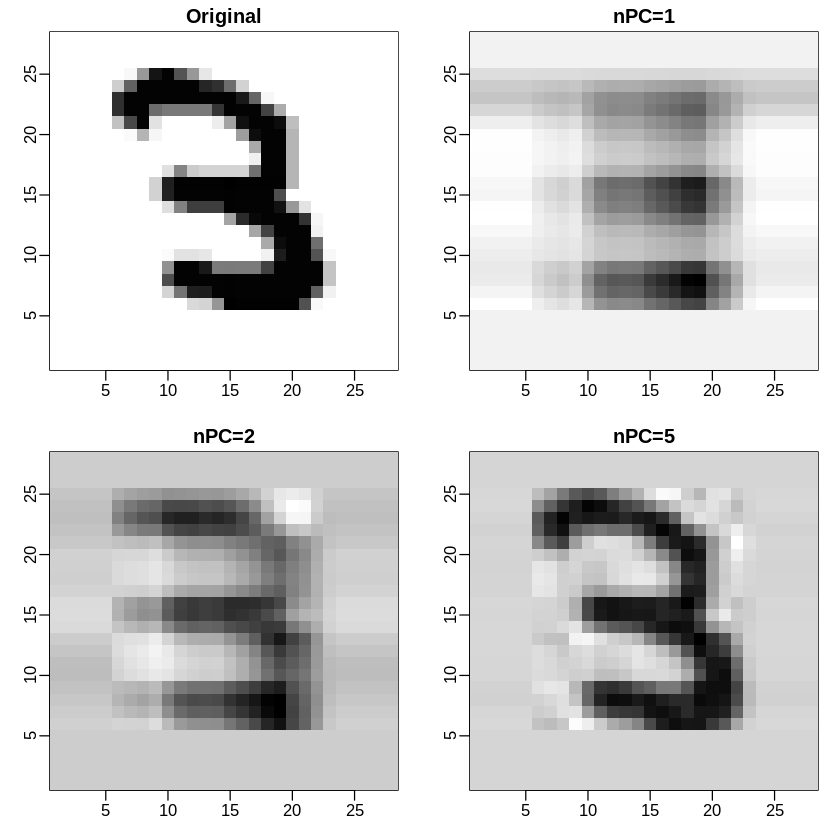

In [28]:
X_bar <- colMeans(X)
X_center <- t(t(X) - X_bar)
X_spectral2 <- eigen(1/(n-1)*t(X_center)%*%X_center)
mypar(mfrow=c(2, 2))
image(1:28, 1:28, z=X, main="Original", xlab="", ylab="", col=gray((255:0)/255))

nPC <- 1
X_hat_pca2 <- t( (X_spectral2$vectors)[,1:nPC]%*%t( (X_spectral2$vectors)[,1:nPC] ) %*% t(X_center) +  X_bar )
image(1:28, 1:28, z=X_hat_pca2, main=paste("nPC=", nPC, sep=""), xlab="", ylab="", col=gray((255:0)/255))

nPC <- 2
X_hat_pca2 <- t( (X_spectral2$vectors)[,1:nPC]%*%t( (X_spectral2$vectors)[,1:nPC] ) %*% t(X_center) +  X_bar )
image(1:28, 1:28, z=X_hat_pca2, main=paste("nPC=", nPC, sep=""), xlab="", ylab="", col=gray((255:0)/255))

nPC <- 5
X_hat_pca2 <- t( (X_spectral2$vectors)[,1:nPC]%*%t( (X_spectral2$vectors)[,1:nPC] ) %*% t(X_center) +  X_bar )
image(1:28, 1:28, z=X_hat_pca2, main=paste("nPC=", nPC, sep=""), xlab="", ylab="", col=gray((255:0)/255))




## now let's compare Sum of Squared Error (SSE) for image reconstruction

There are two trends here. First, when nComp/nPC increase, SSE will decrease, which is consistent with our visual impression that more components lead to a better fit. Second, X_hat_pca2 always have smaller SSE compared with X_hat_pca1/X_hat_svd. Why? Because X_hat_pca2 has one more degree of freedom. As an analogy, X_hat_pca1 is like fitting a regression model with no intercept, i.e. $X\beta$, and X_hat_pca2 is like fitting a regression model with intercept, i.e. $X\beta + \beta_0$.


In [29]:
nComp <- 1
nPC <- 1
X_hat_svd <- X_svd$d[1:nComp]*( (X_svd$u)[,1:nComp]%*%t((X_svd$v)[,1:nComp]) )
X_hat_pca1 <- t( (X_spectral1$vectors)[,1:nPC]%*%t( (X_spectral1$vectors)[,1:nPC] ) %*% t(X) )
X_hat_pca2 <- t( (X_spectral2$vectors)[,1:nPC]%*%t( (X_spectral2$vectors)[,1:nPC] ) %*% t(X_center) +  X_bar )
print(sum((X - X_hat_svd)^2))
print(sum((X - X_hat_pca1)^2))
print(sum((X - X_hat_pca2)^2))

[1] 2632550
[1] 2632550
[1] 2507799


In [30]:
nComp <- 2
nPC <- 2
X_hat_svd <- (X_svd$u)[,1:nComp]%*%diag(X_svd$d[1:nComp])%*%t((X_svd$v)[,1:nComp])
X_hat_pca1 <- t( (X_spectral1$vectors)[,1:nPC]%*%t( (X_spectral1$vectors)[,1:nPC] ) %*% t(X) )
X_hat_pca2 <- t( (X_spectral2$vectors)[,1:nPC]%*%t( (X_spectral2$vectors)[,1:nPC] ) %*% t(X_center) +  X_bar )
print(sum((X - X_hat_svd)^2))
print(sum((X - X_hat_pca1)^2))
print(sum((X - X_hat_pca2)^2))

[1] 1285575
[1] 1285575
[1] 1225461


In [31]:
nComp <- 5
nPC <- 5

X_hat_svd <- (X_svd$u)[,1:nComp]%*%diag(X_svd$d[1:nComp])%*%t((X_svd$v)[,1:nComp])
X_hat_pca1 <- t( (X_spectral1$vectors)[,1:nPC]%*%t( (X_spectral1$vectors)[,1:nPC] ) %*% t(X) )
X_hat_pca2 <- t( (X_spectral2$vectors)[,1:nPC]%*%t( (X_spectral2$vectors)[,1:nPC] ) %*% t(X_center) +  X_bar )
print(sum((X - X_hat_svd)^2))
print(sum((X - X_hat_pca1)^2))
print(sum((X - X_hat_pca2)^2))

[1] 188234.9
[1] 188234.9
[1] 186454
